Rechneranwendungen in der Physik - Übung N.6 Numerische Integration

Santiago.R

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import time

# Die Newton-Cotes Formeln

Die Newton-Cotes Formeln sind eine Gruppe numerischer Quadraturformeln zur näherungsweisen Berechnung von Integralen eindimensionaler Funktionen. Ähnlich zur Taylorentwicklung ist die Grundidee der Newton-Cotes Formel, eine beliebige Funktion $f(x)$ zuerst durch anlegen eines Polynoms $p(x)$ innerhalb bestimmter Interpolationsintervalle $[a,x_0],[x_1,x_2]...[x_n,b]$ anzunähern und dann durch berechnen des Integrals für das Interpolationspolynom $\int_{a}^{b} p_n(x) dx$ eine numerische Lösung der Integration $\int_{a}^{b} f(x) dx$ der beliebigen Funktion in diesem Intervall $[a,b]$ zu erhalten. Für das Integral gilt somit <br> <br> $\int_{a}^{b} f(x) dx \approx \int_{a}^{b} p(x) dx = \sum_{i=0}^n w_i f(x_i)$ <br> <br> wobei die Gewichte $w_i$ durch die Langrange Polynome $l_i(x)$ mit <br> <br> $w_i =\int_{a}^{b} l_i(x) dx = \sum_{j=0}^n \frac{c_{ij}(b^{j+1}-a^{j+1})}{j+1}$ <br> <br> bestimmt werden und die Koeffizienten $c_{ij}$ Teil der Legendre Polynome sind. Vereinfachungen dieses letzten Schritts mit festen Gewichtungen durch entwickeln der Polynome bis zu festen Graden von $n= 1,2,4...$ sind jeweils unter den Namen Trapezregel (n=1), Simpson-Regel (n=2) und Bode/Boole/Milne-Regel (n=4) bekannt. Hierbei gelten für die drei Regeln folgende Stützstellen und Gewichtungen <br> <br> Trapezregel: $x_i= \{a,b\}$, $w_i=\{\frac{b-a}{2},\frac{b-a}{2} \}$ $\Rightarrow \int_{a}^{b} f(x) dx \approx h[f(a)+f(b)]$ <br> Simpson-Regel: $x_i= \{a,\frac{b-a}{2},b\}$, $w_i=\{\frac{b-a}{6},\frac{4(b-a)}{6},\frac{b-a}{6}\}$ $\Rightarrow \int_{a}^{b} f(x) dx \approx h[\frac{f(a)}{3}+\frac{4f(a+h)}{3}+\frac{f(b)}{3}]$ <br> Bode/Boole/Milne-Regel: $x_i= \{a,\frac{b-a}{4},\frac{2(b-a)}{4},\frac{3(b-a)}{4},b\}$, $w_i=\{\frac{7(b-a)}{90},\frac{32(b-a)}{90},\frac{12(b-a)}{90},\frac{32(b-a)}{90},\frac{7(b-a)}{90}\}$ $\Rightarrow \int_{a}^{b} f(x) dx \approx \frac{4h}{90}[7f(a)+32f(a+h)+12f(a+2h)+32f(a+3h)+7f(b)]$ <br> <br> wobei $h$ als $h=\frac{b-a}{2}$ in den Integrationssummen normiert wird. Für die allgemeine numerische Integration mit den drei Regeln folgt somit

In [2]:
#Trapezregel-Integration
def trapezInt(f,a,b,n):
    H=(b-a)/n       #Unterteilen des Intervalls in Stückintervalle zum stückweisen Integrieren
    a_n=a           #Startgrenze Links
    b_n=a+H         #Startgrenze Rechts
    h_n=(b_n-a_n)/2 #Mittlerer Abstand der Grenzen
    Int=0
    k=0
    for i in range(n):
        Int +=h_n*(f(a_n)+f(b_n)) #Trapezregel im Stückintegral
        a_n=b_n     #Aktualisieren der linken Grenze
        b_n=a_n+H   #Aktualisieren der rechten Grenze
        k += 1 #aktualisieren der Iterationsnummer
    return k, Int
#Simpson-Regel Integration
def simpsonInt(f,a,b,n):
    H=(b-a)/n       #Unterteilen des Intervalls in Stückintervalle zum stückweisen Integrieren
    a_n=a           #Startgrenze Links
    b_n=a+H         #Startgrenze Rechts
    h_n=(b_n-a_n)/2 #Mittlerer Abstand der Grenzen
    Int=0
    k=0
    for i in range(n):
        Int +=h_n*(f(a_n)/3+4*f(a_n+h_n)/3+f(b_n)/3) #Simpsons-Regel im Stückintegral
        a_n=b_n     #Aktualisieren der linken Grenze
        b_n=a_n+H   #Aktualisieren der rechten Grenze
        k += 1 #aktualisieren der Iterationsnummer
    return k, Int
#Bode/Boole/Milne-Regel Integration
def bodeInt(f,a,b,n):
    H=(b-a)/n       #Unterteilen des Intervalls in Stückintervalle zum stückweisen Integrieren
    a_n=a           #Startgrenze Links
    b_n=a+H         #Startgrenze Rechts
    h_n=(b_n-a_n)/4 #Mittlerer Abstand der Grenzen
    Int=0
    k=0
    for i in range(n):
        Int +=4*h_n*(7*f(a_n)+32*f(a_n+h_n)+12*f(a_n+2*h_n)+32*f(a_n+3*h_n)+7*f(b_n))/90 #Bode/Boole/Milne-Regel im Stückintegral
        a_n=b_n     #Aktualisieren der linken Grenze
        b_n=a_n+H   #Aktualisieren der rechten Grenze
        k += 1 #aktualisieren der Iterationsnummer
    return k, Int

# Tests

In [3]:
f = lambda x: x**3+x**2-10
trapezInt(f,a=0,b=2,n=10)

(10, -13.280000000000001)

In [4]:
simpsonInt(f,a=0,b=2,n=10)

(10, -13.333333333333336)

In [5]:
bodeInt(f,a=0,b=2,n=10)

(10, -13.333333333333336)

# Testen der drei Integrationsroutinen und grafische Darstellung nach den Intervallsunterteilungen

In [6]:
#Definieren der Testfunktionen
f1 = lambda x: np.exp(-2*x**2)
f2 = lambda x: 0.4*x**6-2*x**5+7*x**4-10*x**3
f3 = lambda x: 1/(0.5*x**2-2*x+3)

#Loops Funktion N.1----------------------------------------------------------------
int1_trapez_liste=[]
for i in range(1,1000):
    Intvalue=trapezInt(f1,a=0,b=1,n=i)
    int1_trapez_liste.append(Intvalue)
    if np.abs((trapezInt(f1,a=0,b=1,n=i+1)[1]-trapezInt(f1,a=0,b=1,n=i)[1])/trapezInt(f1,a=0,b=1,n=i)[1])<0.001:
        break
int1_simpson_liste=[]
for i in range(1,1000):
    Intvalue=simpsonInt(f1,a=0,b=1,n=i)
    int1_simpson_liste.append(Intvalue)
    if np.abs((simpsonInt(f1,a=0,b=1,n=i+1)[1]-simpsonInt(f1,a=0,b=1,n=i)[1])/simpsonInt(f1,a=0,b=1,n=i)[1])<0.001:
        break
int1_bode_liste=[]
for i in range(1,1000):
    Intvalue=bodeInt(f1,a=0,b=1,n=i)
    int1_bode_liste.append(Intvalue)
    if np.abs((bodeInt(f1,a=0,b=1,n=i+1)[1]-bodeInt(f1,a=0,b=1,n=i)[1])/bodeInt(f1,a=0,b=1,n=i)[1])<0.001:
        break
        
#Loops Funktion N.2----------------------------------------------------------------
int2_trapez_liste=[]
for i in range(1,1000):
    Intvalue=trapezInt(f2,a=0,b=4,n=i)
    int2_trapez_liste.append(Intvalue)
    if np.abs((trapezInt(f2,a=0,b=4,n=i+1)[1]-trapezInt(f2,a=0,b=4,n=i)[1])/trapezInt(f2,a=0,b=4,n=i)[1])<0.001:
        break
int2_simpson_liste=[]
for i in range(1,1000):
    Intvalue=simpsonInt(f2,a=0,b=4,n=i)
    int2_simpson_liste.append(Intvalue)
    if np.abs((simpsonInt(f2,a=0,b=4,n=i+1)[1]-simpsonInt(f2,a=0,b=4,n=i)[1])/simpsonInt(f2,a=0,b=4,n=i)[1])<0.001:
        break
int2_bode_liste=[]
for i in range(1,1000):
    Intvalue=bodeInt(f2,a=0,b=4,n=i)
    int2_bode_liste.append(Intvalue)
    if np.abs((bodeInt(f2,a=0,b=4,n=i+1)[1]-bodeInt(f2,a=0,b=4,n=i)[1])/bodeInt(f2,a=0,b=4,n=i)[1])<0.001:
        break
        
#Loops Funktion N.3----------------------------------------------------------------
int3_trapez_liste=[]
for i in range(1,1000):
    Intvalue=trapezInt(f3,a=0,b=10,n=i)
    int3_trapez_liste.append(Intvalue)
    if np.abs((trapezInt(f3,a=0,b=10,n=i+1)[1]-trapezInt(f3,a=0,b=10,n=i)[1])/trapezInt(f3,a=0,b=10,n=i)[1])<0.001:
        break
int3_simpson_liste=[]
for i in range(1,1000):
    Intvalue=simpsonInt(f3,a=0,b=10,n=i)
    int3_simpson_liste.append(Intvalue)
    if np.abs((simpsonInt(f3,a=0,b=10,n=i+1)[1]-simpsonInt(f3,a=0,b=10,n=i)[1])/simpsonInt(f3,a=0,b=10,n=i)[1])<0.001:
        break
int3_bode_liste=[]
for i in range(1,1000):
    Intvalue=bodeInt(f3,a=0,b=10,n=i)
    int3_bode_liste.append(Intvalue)
    if np.abs((bodeInt(f3,a=0,b=10,n=i+1)[1]-bodeInt(f3,a=0,b=10,n=i)[1])/bodeInt(f3,a=0,b=10,n=i)[1])<0.001:
        break
        

<function matplotlib.pyplot.show(*args, **kw)>

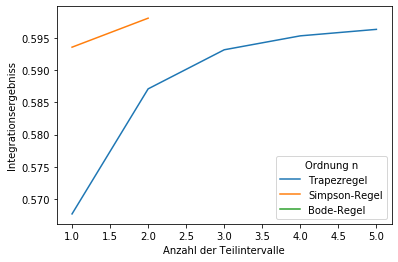

In [7]:
#Plots der Funktion N.1
plt.plot(*zip(*int1_trapez_liste),label='Trapezregel')
plt.plot(*zip(*int1_simpson_liste),label='Simpson-Regel')
plt.plot(*zip(*int1_bode_liste),label='Bode-Regel')
plt.legend(title="Ordnung n",loc='lower right')
plt.xlabel('Anzahl der Teilintervalle')
plt.ylabel('Integrationsergebniss')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

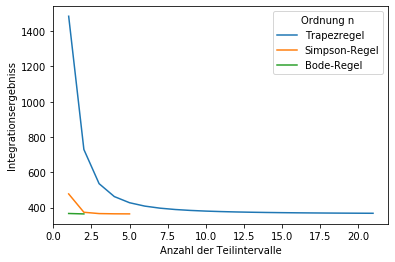

In [8]:
#Plots der Funktion N.2
plt.plot(*zip(*int2_trapez_liste),label='Trapezregel')
plt.plot(*zip(*int2_simpson_liste),label='Simpson-Regel')
plt.plot(*zip(*int2_bode_liste),label='Bode-Regel')
plt.legend(title="Ordnung n",loc='upper right')
plt.xlabel('Anzahl der Teilintervalle')
plt.ylabel('Integrationsergebniss')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

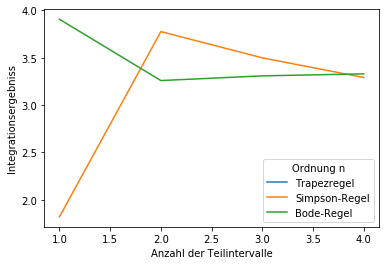

In [9]:
#Plots der Funktion N.1
plt.plot(*zip(*int3_trapez_liste),label='Trapezregel')
plt.plot(*zip(*int3_simpson_liste),label='Simpson-Regel')
plt.plot(*zip(*int3_bode_liste),label='Bode-Regel')
plt.legend(title="Ordnung n",loc='lower right')
plt.xlabel('Anzahl der Teilintervalle')
plt.ylabel('Integrationsergebniss')
plt.show